### Slade Brooks
### brooksl@mail.uc.edu
### Exam 2

In [84]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy import integrate as integrate
# import custom modules
sys.path.append("..//lib//")
import pyvot

# Part A

In [85]:
# create function for function
def f(x): return (np.exp(2*x)-1)*np.sin(3*np.pi*x)*np.cos(4*np.pi*x)

# set up range of vals
xs = np.linspace(0, 1, 100)

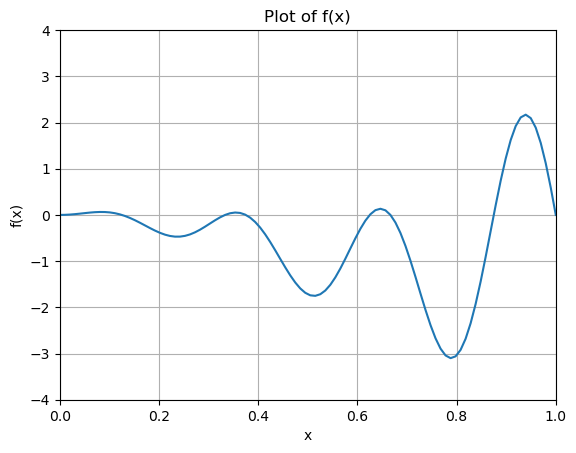

In [86]:
# plot function
plt.plot(xs, f(xs))
plt.xlabel("x")
plt.grid()
plt.ylabel("f(x)")
plt.title("Plot of f(x)")
plt.xlim([0, 1])
plt.ylim([-4, 4])
plt.show()

# Part B

In [87]:
# find first root range with rootsearch
a, b = pyvot.rootsearch(f, 0.01, 1, 0.01)

# also find ranges of next 2 roots
a1, b1 = pyvot.rootsearch(f, b, 1, 0.01)
a2, b2 = pyvot.rootsearch(f, b1, 1, 0.01)

# use bisection to find roots at each point
r = pyvot.bisection(f, a, b)
r1 = pyvot.bisection(f, a1, b1)
r2 = pyvot.bisection(f, a2, b2)

# print roots
print("The first 3 positive roots are: {0:.6f}, {1:.6f}, and {2:.6f}".format(r, r1, r2))

The first 3 positive roots are: 0.125000, 0.333333, and 0.375000


For this solution, I used the rootsearch function from the book to determine the range of the roots. We skip 0 because that is technically not a positive root, and search for roots on the range from 0.01 to 1. Then, to find the next 2 roots we search starting from the end range of the previous root (also using rootsearch). Rootsearch determines a small range over which the sign of the function changes.

Then we use the bisection method to approximate the roots. This method uses bisection and the range from rootsearch to determine the location of the root.

In [88]:
# for verification, will find derivative of function using wolfram
def df(x): return 3*np.pi*(np.exp(2*x)-1)*np.cos(3*np.pi*x)*np.cos(4*np.pi*x) + \
        2*np.sin(3*np.pi*x)*(np.exp(2*x)*np.cos(4*np.pi*x) - 2*np.pi*(np.exp(2*x) - 1)*np.sin(4*np.pi*x))

# use newton raphson to verify results
rn = pyvot.newtonRaphson(f, df, a, b)
rn1 = pyvot.newtonRaphson(f, df, a1, b1)
rn2 = pyvot.newtonRaphson(f, df, a2, b2)
print("The first 3 positive roots are: {0:.6f}, {1:.6f}, and {2:.6f}".format(rn, rn1, rn2))

The first 3 positive roots are: 0.125000, 0.333333, and 0.375000


We can calculate the analytical derivative and code that in also. Then, we can use our ranges from rootsearch as well as newton raphson (another root finding method from the book) to verify the roots we found are correct.

We can also verify these roots using wolfram.

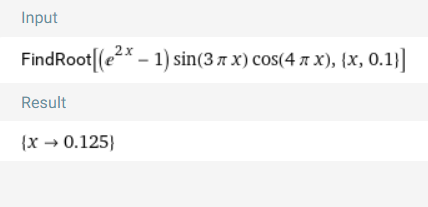

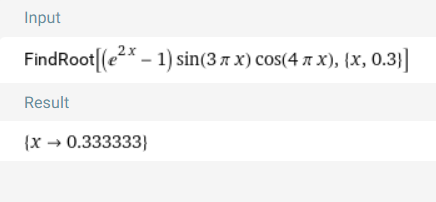

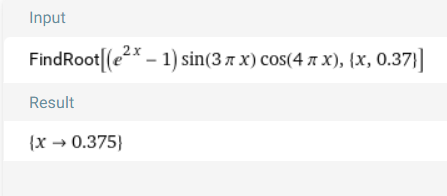

# Part C

In [89]:
# set up list of xs to test
dxs = np.arange(0, 2.5, 0.5)

# set up cent dif fxn
def centdif1(f, xs, dx):
    return (f(xs + dx) - f(xs - dx))/(2*dx)

# loop thru vals and calc deriv
derivs = [centdif1(f, x, dx=10**-5) for x in dxs]

# loop and print
for i in range(len(dxs)):
    print("The derivative of f(x) at {0:.1f} = {1:.6f}".format(dxs[i], derivs[i]))

The derivative of f(x) at 0.0 = 0.000000
The derivative of f(x) at 0.5 = -5.436564
The derivative of f(x) at 1.0 = -60.215435
The derivative of f(x) at 1.5 = 40.171073
The derivative of f(x) at 2.0 = 505.150659


To compute the derivative at each point, we can use the central difference method from a previous homework. We learned that the most accurate value for dx was 10^-5, so we use that in the equation (from the book) for central difference to approximate the derivative at each of the given points.

In [92]:
# verify with dfx
vdfx = [df(x) for x in dxs]
for i in range(len(dxs)):
    print("The derivative of f(x) at {0:.1f} = {1:.6f}".format(dxs[i], vdfx[i]))

The derivative of f(x) at 0.0 = 0.000000
The derivative of f(x) at 0.5 = -5.436564
The derivative of f(x) at 1.0 = -60.215435
The derivative of f(x) at 1.5 = 40.171074
The derivative of f(x) at 2.0 = 505.150663


We can verify these derivatives using the analytical one we got from wolfram.

We can also use wolfram to double check.

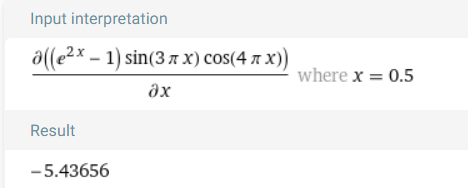

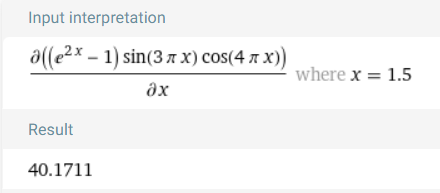

# Part D

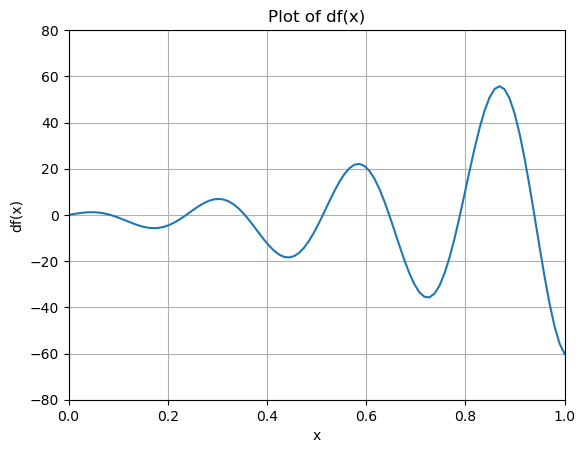

In [90]:
# create plot with the same method as before
pltdf = [centdif1(f, x, dx=10**-5) for x in xs]

# plot deriv
plt.plot(xs, pltdf)
plt.xlabel("x")
plt.grid()
plt.ylabel("df(x)")
plt.title("Plot of df(x)")
plt.xlim([0, 1])
plt.ylim([-80, 80])
plt.show()

# Part E

In [91]:
# create function again with lambda
f = lambda x: (np.exp(2*x)-1)*np.sin(3*np.pi*x)*np.cos(4*np.pi*x)

# set integration lims
a = 0
b = r

# do integration
ans, err = integrate.quad(f, a, b)

# print answer
print("The integral of f(x) from 0 to {0:.3f} is {1:.6f}".format(r, ans))

The integral of f(x) from 0 to 0.125 is 0.004350
